1. Read CVS file and store it's data.


In [ ]:
import pandas as pd

data = pd.read_csv('Income.csv')
print(data.head())

   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830


2. EDA

Using the seaborn library, we can visualize the relationship between income and age in one plot, and between income and experience in another plot.

As we can see, experience and income have a close relationship, with the experience data points aligning closely along a line relative to income.

However, the relationship between age and income is not entirely linear, indicating that income does not necessarily increase with age.

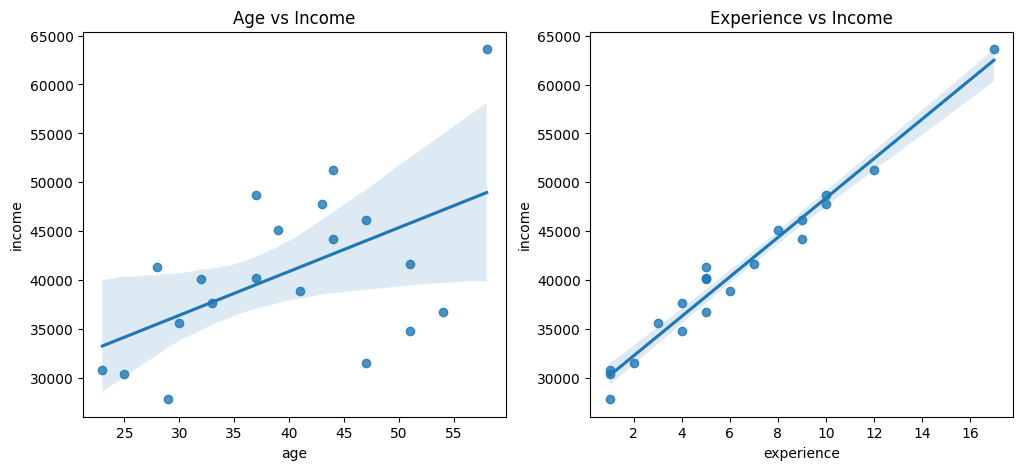

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot(x="age", y="income", data=data, ax=axes[0])
sns.regplot(x="experience", y="income", data=data, ax=axes[1])
axes[0].set_title("Age vs Income")
axes[1].set_title("Experience vs Income")
plt.show()

3. Preprocessing

I used formula for skleard.preprocessing.StandardScaler and implent it by my own.

Steps to Implement Standard Scaling on a DataFrame

1.   Compute the Mean for each column (feature).
2.   Compute the Standard Deviation for each column (feature).
3.   Subtract the Mean and Divide by the Standard Deviation for each element in the DataFrame.

In [ ]:
import numpy as np

mean = data.mean()
std_dev = data.std()

standardized_data = (data - mean) / std_dev

print("Original Data:\n", data.head())
print("\nMean:\n", mean)
print("\nStandard Deviation:\n", std_dev)
print("\nStandardized Data:\n", standardized_data.head())

Original Data:
    age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830

Mean:
 age              39.65
experience        6.20
income        40735.50
dtype: float64

Standard Deviation:
 age             10.027725
experience       4.124382
income        8439.797625
dtype: float64

Standardized Data:
         age  experience    income
0 -1.460950   -1.260795 -1.218690
1 -0.962332   -0.775874 -0.600192
2  0.732968   -1.018334 -1.084801
3 -0.762885   -0.290953 -0.071743
4  0.334074    0.921350  0.840601


4. Implement Linear Regression use Gradient Descent

First, we extract our features data and target data from standardized_data and saved in X and Y.

Next, we initialized some parameters. we set learning rate = 0.01 and repeat the operation in 1000 epochs. weights and biases are initially zero.

We should define a function which calculates mean squared error, too. Formula for mean squared error is as follows:

$$\mathrm{MSE} = \frac{1}{m} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

Next, in each epoch we calclate predicted value for y use:

$$\hat{Y}=XW+b$$

We should update weight and biases formulas, too:
$$w = w - \alpha \frac{\partial L(w, b)}{\partial w} \\
b = b - \alpha \frac{\partial L(w, b)}{\partial b}$$

deriatives would calculate as follows:

$$\frac{\partial}{\partial w} \left( \frac{1}{m} \sum_{i=1}^{m} (y_i - (w^T x_i+b))^2 \right) = \frac{1}{m} \sum_{i=1}^{m} 2(y_i - (w^T x_i + b))(-x_i)
= -\frac{2}{m} \sum_{i=1}^{m} x_i(y_i - (w^T x_i+b)) = -\frac{2}{m} X^T (y - y_{pred})$$

and:

$$\frac{\partial}{\partial b} \left( \frac{1}{m} \sum_{i=1}^{m} (y_i - (w^T x_i + b))^2 \right) = \frac{1}{m} \sum_{i=1}^{m} 2(y_i - (w^T x_i + b)) \cdot (-1) = -\frac{2}{m}\sum_{i=1}^{m}(y_{i}-(w^{T}x_{i}+b)) = -\frac{2}{m} \sum_{i=1}^{m} (y - y_{pred})$$

finally we print mean squared error value after each 100 epoch and and the final value is 0.02.

In [ ]:
X = standardized_data[['age', 'experience']].values
Y = standardized_data['income'].values

learning_rate = 0.01
epochs = 1000
m, n = X.shape

weights = np.zeros(n)
bias = 0

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

for epoch in range(epochs):
    y_pred = np.dot(X, weights) + bias

    dw = (-2 / m) * np.dot(X.T, (Y - y_pred))
    db = (-2 / m) * np.sum(Y - y_pred)

    weights -= learning_rate * dw
    bias -= learning_rate * db

    mse = mean_squared_error(Y, y_pred)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Mean Squared Error = {mse}")

y_final_pred = np.dot(X, weights) + bias
mse_final = mean_squared_error(Y, y_final_pred)
print("\nFinal Mean Squared Error:", mse_final)
print("Weights:", weights)
print("Bias:", bias)

Epoch 0: Mean Squared Error = 0.95
Epoch 100: Mean Squared Error = 0.08097486109326647
Epoch 200: Mean Squared Error = 0.034926101841973985
Epoch 300: Mean Squared Error = 0.024616984532520307
Epoch 400: Mean Squared Error = 0.022241897646113538
Epoch 500: Mean Squared Error = 0.02169457283456874
Epoch 600: Mean Squared Error = 0.02156844478294923
Epoch 700: Mean Squared Error = 0.021539379253019728
Epoch 800: Mean Squared Error = 0.02153268125824881
Epoch 900: Mean Squared Error = 0.02153113774144179

Final Mean Squared Error: 0.021530782046309878
Weights: [-0.11747705  1.05634755]
Bias: 5.515032874825425e-17


5. Draw the line extracted from gradient descent method.

Here, we want to plot the relationship between "age" and "income" in 2D, so we need to fix one feature (experience) to visualize the effect of "age" on "income."

for fixing the experience, we used it's mean value and imply it on linear regression equation.

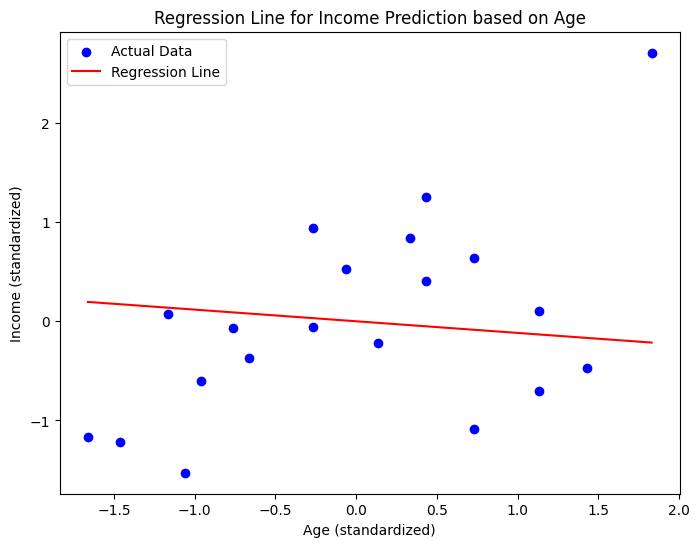

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], Y, color="blue", label="Actual Data")

age_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
experience_mean = np.mean(X[:, 1])

predicted_income = weights[0] * age_range + weights[1] * experience_mean + bias

plt.plot(age_range, predicted_income, color="red", label="Regression Line")

plt.xlabel("Age (standardized)")
plt.ylabel("Income (standardized)")
plt.title("Regression Line for Income Prediction based on Age")
plt.legend()
plt.show()

Here, we want to plot the relationship between "experience" and "income" in 2D, so we need to fix one feature (age) to visualize the effect of "experience" on "income."

for fixing the age, we used it's mean value and imply it on linear regression equation.

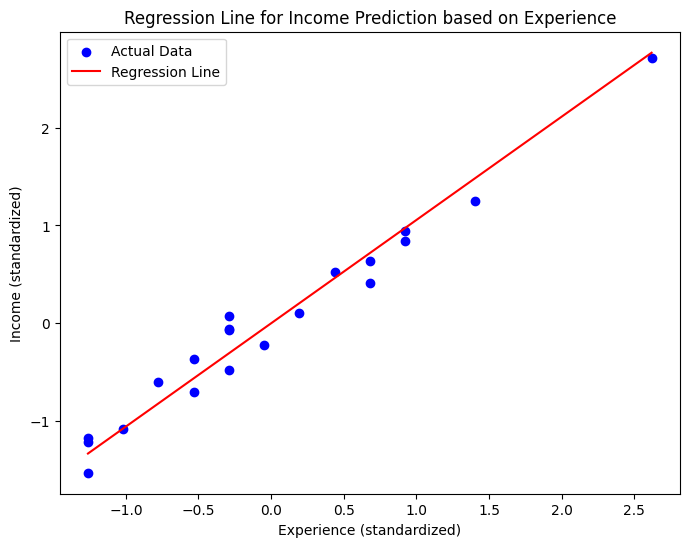

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(X[:, 1], Y, color="blue", label="Actual Data")

experience_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
age_mean = np.mean(X[:, 0])

predicted_income = weights[0] * age_mean + weights[1] * experience_range + bias

plt.plot(experience_range, predicted_income, color="red", label="Regression Line")

plt.xlabel("Experience (standardized)")
plt.ylabel("Income (standardized)")
plt.title("Regression Line for Income Prediction based on Experience")
plt.legend()
plt.show()

6. Implement Linear Regression use Normal Equation

First, we extract our features data and target data from standardized_data and saved in X and Y.

We will use the mean squarred error function defined in previous part again.

We should add a bias term to the feature matrix, so we add a column of ones for this purpose.

As we saw in lectures, best theta value use normal equation calculates as follows:

$$\theta = (X^TX)^{-1}X^TY$$

Dot product of our best theta and biased X gives predicted Y value.


Now we can calculate mean squared error.

In [ ]:
import numpy as np
import pandas as pd

X = standardized_data[['age', 'experience']].values
Y = standardized_data['income'].values

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

Y_pred = X_b.dot(theta_best)

mse = mean_squared_error(Y, Y_pred)

print("Optimal weights (theta):")
print(theta_best)
print("\nMean Squared Error (MSE):")
print(mse)


Optimal weights (theta):
[ 2.08166817e-17 -1.17858717e-01  1.05672922e+00]

Mean Squared Error (MSE):
0.021530675532824305


As we can see,the mean squared error value in both algorithms are almost the same, but normal equation leads to smaller value.